# House Price Prediction from Scratch

## Overview  
This project aims to build a **house price prediction model** from scratch using only **NumPy, Pandas, Matplotlib, and Seaborn**. The goal is to explore different regression techniques and optimization methods to understand their performance in predicting house prices.

We will experiment with **Simple and Multiple Linear Regression**, **Gradient Descent Variants**, **Polynomial Regression**, and **Regularization Techniques (Lasso & Ridge)**. The model's performance will be evaluated on both **training and test data** to analyze **overfitting and underfittiariable is **price**.

## Steps  
1. **Data Preprocessing** - Cleaning, splitting, and normalizing the data.  
2. **Exploratory Data Analysis (EDA)** - Visualizing feature distributions and correlations.  
3. **Linear Regression** - Implementing simple and multiple linear regression models.  
4. **Gradient Descent Variants** - Experimenting with different optimization techniques.  
5. **Polynomial Regression** - Investigating the impact of polynomial degrees.  
6. **Regularization** - Applying Lasso and Ridge regression to prevent overfitting.  
7. **Model Evaluation** - Analyzing results and summarizing key findings.

Throughout the project, we will visualize loss trends, experiment with different hyperparameters, and interpret the results to gain insights into the effectiveness of different approaches.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**

In [2]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Module 1: Importing Data Sets

In [3]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)

## Data Exploration

Before proceeding with preprocessing, we need to understand the dataset by:
- Displaying basic information about the data.
- Checking for missing values.
- Viewing summary statistics.
- Displaying the first few rows.

This will help us identify any necessary data cleaning steps.
 steps.


In [4]:
#displaying the first five rows
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Dropping the columns "Unnamed: 0', 'date' and  'id'
df.drop(['Unnamed: 0', 'id', 'date'],  axis = 1, inplace = True)

#Let us see the statistic of the data and confirned the columns are sucseccfully dropped
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#getting the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21600 non-null  float64
 2   bathrooms      21603 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>

In [7]:
print("The total number of NaNs : ", df.isnull().sum().sum())
print(f"Number of NaN in bedrooms: {df['bedrooms'].isnull().sum()}")
print(f"Number of NaN in bathrooms: {df['bathrooms'].isnull().sum()}")

The total number of NaNs :  23
Number of NaN in bedrooms: 13
Number of NaN in bathrooms: 10


## Replacing NaN with mean

In [8]:
#Replacing the NaN with mean value of bedroom
bed_mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, bed_mean, inplace = True)

#Replacing the NaN with mean value of bathroom
bath_mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, bed_mean, inplace = True)

<ipython-input-8-334cb95aeeaf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, bed_mean, inplace = True)
<ipython-input-8-334cb95aeeaf>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Let us verify if the null values are succefully replaced

In [9]:

print("The total number of NaNs : ", df.isnull().sum().sum())
print(f"Number of NaN in bedrooms: {df['bedrooms'].isnull().sum()}")
print(f"Number of NaN in bathrooms: {df['bathrooms'].isnull().sum()}")

The total number of NaNs :  0
Number of NaN in bedrooms: 0
Number of NaN in bathrooms: 0


## Exploratory Data Analysis: Correlation Heatmap

To understand the relationships between different features, we will compute and visualize the **correlation matrix** using a heatmap.  

- Correlation values range from **-1 to 1**:  
  - **1**: Strong positive correlation (as one feature increases, the other increases).  
  - **0**: No correlation.  
  - **-1**: Strong negative correlation (as one feature increases, the other decreases).  

This helps us identify which features are strongly related to **price**, as well as potential multicollinearity issues.


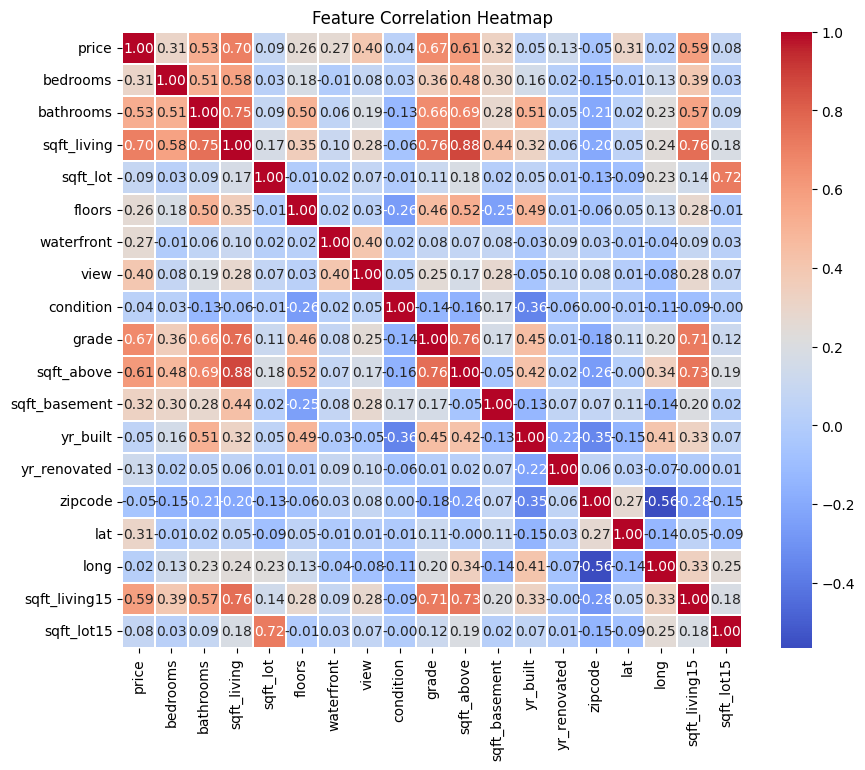

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)

# Add a title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

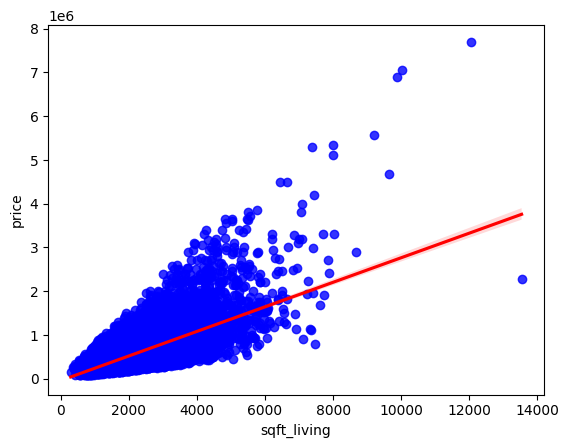

In [11]:
sns.regplot(x=df[['sqft_living']], y=df['price'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

- **sqft_living** has the strongest correlation with **price** (0.7), meaning larger living spaces tend to increase house prices.  
- There is strong **multicollinearity** between **sqft_living** and other features, especially **sqft_above** (0.88).  
- Several other features also have high correlation (above 0.7) with **sqft_living**, suggesting that they contain similar information.  
- This multicollinearity might affect model performance, as highly correlated features can lead to redundancy in the model. We may later explore techniques like **regularization (Lasso & Ridge)** to handle this issue.


**Extracticng the features and the target from our dataframe**

In [12]:
X = df.drop(columns=["price"]).values  # Convert DataFrame to NumPy array
y = df["price"].values  # Target variable


**Function for splitting the data into training and test examples**

In [13]:
def splt(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

**Function for transforming the features to polynomial**

In [14]:
def polynomial_features(degree, X_train, X_test):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    return X_train_poly, X_test_poly

**Function for scaling data**

In [15]:
def scale(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

**Linear Regression**

In [16]:
X_train, X_test, y_train, y_test = splt(X, y, 0.2)
X_train_scaled, X_test_scaled = scale(X_train, X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

print(f"R-squared (Training): {lin_reg.score(X_train_scaled, y_train)}")
print(f"R-squared (Test): {lin_reg.score(X_test_scaled, y_test)}")

R-squared (Training): 0.7059511225152062
R-squared (Test): 0.6760561852649182


**Polynomial Regression Ridge**

Here, we will experiment with different degrees of polynomial and choose the best one, to avoid overfitting/underfitting (Bias-Variance Tradeoff)

In [17]:
def model_evaluation(X_train, X_test, y_train, y_test, alpha):
    degrees = [1, 2, 3]
    train_score = []
    test_score = []

    for degree in degrees:
        # Create Polynomial Features for the current degree
        X_train_poly, X_test_poly = polynomial_features(degree, X_train, X_test)

        # Scale the features
        X_train_scaled, X_test_scaled = scale(X_train_poly, X_test_poly)

        # Train the model
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)

        # Predict on both train and test data
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Store the R-squared values for plotting
        train_score.append(r2_score(y_train, y_train_pred))
        test_score.append(r2_score(y_test, y_test_pred))

        # Print the results for each degree
        print(f"Degree: {degree}")
        print(f"R-squared (Training): {r2_score(y_train, y_train_pred):.4f}")
        print(f"R-squared (Test): {r2_score(y_test, y_test_pred):.4f}")
        print("-" * 50)

    return train_score, test_score

Degree: 1
R-squared (Training): 0.7060
R-squared (Test): 0.6761
--------------------------------------------------
Degree: 2
R-squared (Training): 0.8346
R-squared (Test): 0.7980
--------------------------------------------------
Degree: 3
R-squared (Training): 0.9046
R-squared (Test): -0.6101
--------------------------------------------------


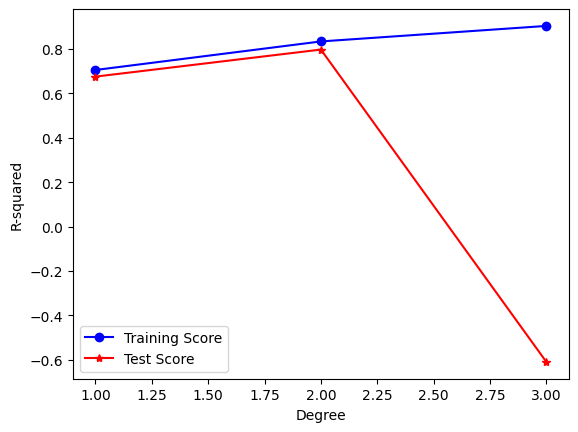

In [18]:
train_score, test_score = model_evaluation(X_train, X_test, y_train, y_test, alpha=None)

# Plot the R-squared values for each degree
degrees = [1, 2, 3]
plt.plot(degrees, train_score, label='Training Score', color = 'b', marker = 'o')
plt.plot(degrees, test_score, label='Test Score', color = 'r', marker = '*')
plt.xlabel('Degree')
plt.ylabel('R-squared')
plt.legend()
plt.show()

We can see from the plot above that a degree of 1 underfits the data, with relatively low training accuracy. On the other hand, a degree of 3 overfits the data, showing very high training accuracy but very low test accuracy. The best model appears to be with degree 2, which strikes a balance with high training and testing accuracy.

# **Regularization**
Now, let's apply L1 and L2 regualarizations with different regualarization parameters

Alpha: 0.0001
Model: Ridge
R-squared (Training): 0.8346
R-squared (Test): 0.7977
MSE (Training): 21929518696.6264
MSE (Test): 29061569334.0138
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+14, tolerance: 2.292e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
R-squared (Training): 0.7914
R-squared (Test): 0.7459
MSE (Training): 27651807324.5591
MSE (Test): 36508833647.9100
--------------------------------------------------
Alpha: 0.001
Model: Ridge
R-squared (Training): 0.8334
R-squared (Test): 0.7961
MSE (Training): 22087475158.7479
MSE (Test): 29291447516.9234
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+14, tolerance: 2.292e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
R-squared (Training): 0.7914
R-squared (Test): 0.7459
MSE (Training): 27651808136.2435
MSE (Test): 36508826589.8711
--------------------------------------------------
Alpha: 0.01
Model: Ridge
R-squared (Training): 0.8275
R-squared (Test): 0.7893
MSE (Training): 22865153734.3804
MSE (Test): 30267825419.1971
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+14, tolerance: 2.292e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
R-squared (Training): 0.7914
R-squared (Test): 0.7459
MSE (Training): 27651816243.4303
MSE (Test): 36508755744.9074
--------------------------------------------------
Alpha: 0.1
Model: Ridge
R-squared (Training): 0.8110
R-squared (Test): 0.7719
MSE (Training): 25050127609.6847
MSE (Test): 32767109233.7804
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.388e+14, tolerance: 2.292e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
R-squared (Training): 0.7914
R-squared (Test): 0.7459
MSE (Training): 27651896677.8516
MSE (Test): 36508020970.4735
--------------------------------------------------
Alpha: 1.0
Model: Ridge
R-squared (Training): 0.7986
R-squared (Test): 0.7569
MSE (Training): 26700424528.4313
MSE (Test): 34918178525.2599
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+14, tolerance: 2.292e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
R-squared (Training): 0.7914
R-squared (Test): 0.7459
MSE (Training): 27652762693.7587
MSE (Test): 36500408921.6602
--------------------------------------------------
Alpha: 10
Model: Ridge
R-squared (Training): 0.7912
R-squared (Test): 0.7478
MSE (Training): 27674917144.6645
MSE (Test): 36236816120.0647
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.120e+14, tolerance: 2.292e+11
  model = cd_fast.enet_coordinate_descent(


Model: Lasso
R-squared (Training): 0.7913
R-squared (Test): 0.7464
MSE (Training): 27666243493.7175
MSE (Test): 36429192907.1314
--------------------------------------------------


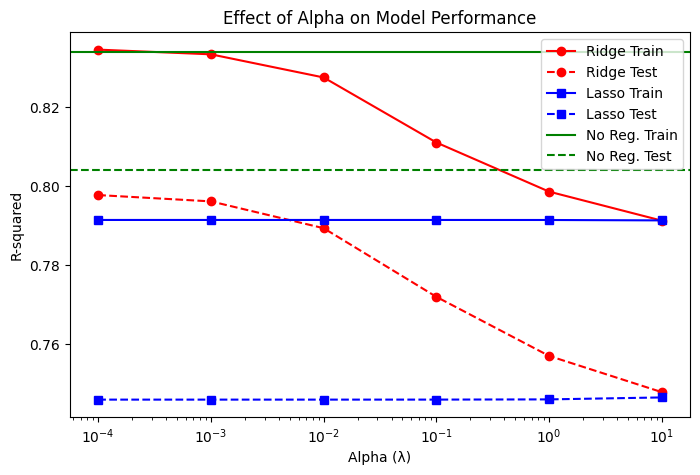

In [19]:
def model_evaluation(X_train, X_test, y_train, y_test, alpha):
    models = [
        Ridge(alpha=alpha),
        Lasso(alpha=alpha)
    ]

    ridge_train_score = []
    ridge_test_score = []
    lasso_train_score = []
    lasso_test_score = []

    # Generate polynomial features and scale
    X_train_poly, X_test_poly = polynomial_features(2, X_train, X_test)
    X_train_scaled, X_test_scaled = scale(X_train_poly, X_test_poly)

    # Train each model and evaluate performance
    for model in models:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        print(f"Model: {model.__class__.__name__}")
        print(f"R-squared (Training): {r2_score(y_train, y_train_pred):.4f}")
        print(f"R-squared (Test): {r2_score(y_test, y_test_pred):.4f}")
        print(f"MSE (Training): {mean_squared_error(y_train, y_train_pred):.4f}")
        print(f"MSE (Test): {mean_squared_error(y_test, y_test_pred):.4f}")
        print("-" * 50)

        if isinstance(model, Ridge):
            ridge_train_score.append(r2_score(y_train, y_train_pred))
            ridge_test_score.append(r2_score(y_test, y_test_pred))

        elif isinstance(model, Lasso):
            lasso_train_score.append(r2_score(y_train, y_train_pred))
            lasso_test_score.append(r2_score(y_test, y_test_pred))

    # Return lists of scores
    return ridge_train_score, ridge_test_score, lasso_train_score, lasso_test_score

# Define alpha values to test
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

# Store results for different alpha values
ridge_train_score = []
ridge_test_score = []
lasso_train_score = []
lasso_test_score = []

# Loop over different alpha values
for alpha in alphas:
    print(f"Alpha: {alpha}")
    ridge_train, ridge_test, lasso_train, lasso_test = model_evaluation(X_train, X_test, y_train, y_test, alpha)
    ridge_train_score.append(ridge_train)
    ridge_test_score.append(ridge_test)
    lasso_train_score.append(lasso_train)
    lasso_test_score.append(lasso_test)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(alphas, ridge_train_score, label="Ridge Train", color='r', marker="o")
plt.plot(alphas, ridge_test_score, label="Ridge Test", marker="o", color='r', linestyle='--')
plt.plot(alphas, lasso_train_score, label="Lasso Train", marker="s", color='b')
plt.plot(alphas, lasso_test_score, label="Lasso Test", marker="s", color='b', linestyle='--')
plt.axhline(0.8339, color='g', linestyle='-', label="No Reg. Train")
plt.axhline(0.8041, color='g', linestyle='--', label="No Reg. Test")
plt.xlabel("Alpha (λ)")
plt.ylabel("R-squared")
plt.legend()
plt.title("Effect of Alpha on Model Performance")
plt.xscale('log')  # Use a log scale for the x-axis for better visualization
plt.show()

Since the polynomial model of degree 2 performs optimally, demonstrating a good balance between training and test accuracy without signs of underfitting or overfitting, the use of regularization is unnecessary. The model already captures the underlying patterns effectively, and introducing regularization techniques like Ridge or Lasso does not offer significant improvements. Therefore, we can conclude that a polynomial model of degree 2 is sufficient for this task, and regularization is not required in this case.